# Problem Statement

- Size of test set: 2671 records

- FEATURES: Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

## Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import random

sns.set_context('notebook',font_scale=1.5)

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.shape,test_data.shape

((8012, 11), (2671, 10))

In [4]:
train_data.head()

Airline Date_of_Journey    Source Destination            Route Dep_Time  \
0  Airline C      12/06/2019     Delhi      Cochin  DEL → MAA → COK    20:40   
1  Airline A      18/06/2019  Banglore       Delhi        BLR → DEL    18:55   
2  Airline C      18/05/2019     Delhi      Cochin  DEL → BOM → COK    03:50   
3  Airline A       6/05/2019   Kolkata    Banglore  CCU → BOM → BLR    20:00   
4  Airline A       9/05/2019   Kolkata    Banglore  CCU → BOM → BLR    06:30   

   Arrival_Time Duration Total_Stops              Additional_Info  Price  
0  09:25 13 Jun  12h 45m      1 stop                      No info   7480  
1         22:00    3h 5m    non-stop                      No info   8016  
2         19:15  15h 25m      1 stop                      No info   8879  
3  08:15 07 May  12h 15m      1 stop  In-flight meal not included   9663  
4         12:00   5h 30m      1 stop  In-flight meal not included   9663

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [7]:
# Checking missing value in dataset
train_data.isnull().values.any(),test_data.isnull().values.any()

(True, False)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dropna(inplace=True)

In [10]:
# Checking if there are any Duplicate values
train_data[train_data.duplicated()]

Airline Date_of_Journey Source Destination                  Route  \
1048  Airline A      15/06/2019  Delhi      Cochin  DEL → JAI → BOM → COK   
1331  Airline A      12/06/2019  Delhi      Cochin  DEL → NAG → BOM → COK   
1421  Airline A      15/06/2019  Delhi      Cochin  DEL → JAI → BOM → COK   
1909  Airline A      21/03/2019  Delhi      Cochin  DEL → AMD → BOM → COK   
2000  Airline C       9/05/2019  Delhi      Cochin  DEL → GOI → BOM → COK   
...         ...             ...    ...         ...                    ...   
7800  Airline A      27/06/2019  Delhi      Cochin  DEL → AMD → BOM → COK   
7833  Airline C      18/05/2019  Delhi      Cochin  DEL → GOI → BOM → COK   
7851  Airline A      21/03/2019  Delhi      Cochin  DEL → MAA → BOM → COK   
7923  Airline C      21/05/2019  Delhi      Cochin  DEL → HYD → BOM → COK   
7962  Airline A       6/06/2019  Delhi      Cochin  DEL → JAI → BOM → COK   

     Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
1048    05:30  04:25 16 Jun  22h 55m     2 stops  In-flight meal not included   
1331    14:35  12:35 13 Jun      22h     2 stops  In-flight meal not included   
1421    05:30  04:25 16 Jun  22h 55m     2 stops                      No info   
1909    19:10  04:25 23 Mar  33h 15m     2 stops  In-flight meal not included   
2000    22:00  19:15 10 May  21h 15m     2 stops                      No info   
...       ...           ...      ...         ...                          ...   
7800    23:05  12:35 28 Jun  13h 30m     2 stops                      No info   
7833    22:00  19:15 19 May  21h 15m     2 stops                      No info   
7851    16:10  18:50 22 Mar  26h 40m     2 stops  In-flight meal not included   
7923    17:15  19:15 22 May      26h     2 stops                      No info   
7962    09:40  12:35 07 Jun  26h 55m     2 stops  In-flight meal not included   

      Price  
1048  10368  
1331  10919  
1421  13014  
1909   8834  
2000  10441  
...     ...  
7800  12819  
7833  10441  
7851   8728  
7923  11972  
7962  11733  

[117 rows x 11 columns]

In [11]:
train_data.drop_duplicates()

Airline Date_of_Journey    Source Destination                  Route  \
0     Airline C      12/06/2019     Delhi      Cochin        DEL → MAA → COK   
1     Airline A      18/06/2019  Banglore       Delhi              BLR → DEL   
2     Airline C      18/05/2019     Delhi      Cochin        DEL → BOM → COK   
3     Airline A       6/05/2019   Kolkata    Banglore        CCU → BOM → BLR   
4     Airline A       9/05/2019   Kolkata    Banglore        CCU → BOM → BLR   
...         ...             ...       ...         ...                    ...   
8007  Airline A      12/06/2019   Kolkata    Banglore        CCU → BOM → BLR   
8008  Airline C       9/06/2019     Delhi      Cochin  DEL → GOI → BOM → COK   
8009  Airline A       3/03/2019     Delhi      Cochin        DEL → BOM → COK   
8010  Airline A      18/05/2019     Delhi      Cochin        DEL → BOM → COK   
8011  Airline A       9/05/2019   Kolkata    Banglore        CCU → DEL → BLR   

     Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
0       20:40  09:25 13 Jun  12h 45m      1 stop                      No info   
1       18:55         22:00    3h 5m    non-stop                      No info   
2       03:50         19:15  15h 25m      1 stop                      No info   
3       20:00  08:15 07 May  12h 15m      1 stop  In-flight meal not included   
4       06:30         12:00   5h 30m      1 stop  In-flight meal not included   
...       ...           ...      ...         ...                          ...   
8007    06:30  04:40 13 Jun  22h 10m      1 stop  In-flight meal not included   
8008    22:00  19:15 10 Jun  21h 15m     2 stops                      No info   
8009    08:00  04:25 04 Mar  20h 25m      1 stop                      No info   
8010    11:30  12:35 19 May   25h 5m      1 stop  In-flight meal not included   
8011    20:25  23:35 10 May  27h 10m      1 stop                      No info   

      Price  
0      7480  
1      8016  
2      8879  
3      9663  
4      9663  
...     ...  
8007   7594  
8008  10651  
8009  17024  
8010  12373  
8011  13067  

[7894 rows x 11 columns]

In [12]:
train_data.shape

(8011, 11)

In [13]:
# Drop duplicates value
train_data.drop_duplicates(keep='first',inplace=True)

In [14]:
train_data.shape

(7894, 11)

In [15]:
# Checking if there are any Duplicate values
test_data[test_data.duplicated()]

Airline Date_of_Journey    Source Destination                  Route  \
431   Airline A      21-03-2019     Delhi      Cochin  DEL → BDQ → BOM → COK   
806   Airline A      03-03-2019     Delhi      Cochin  DEL → IDR → BOM → COK   
1503  Airline A      27-06-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
1614  Airline D      12-06-2019     Delhi      Cochin        DEL → BOM → COK   
1628  Airline A      24-06-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
1639  Airline A      06-03-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
1706  Airline C      03-03-2019     Delhi      Cochin  DEL → HYD → BOM → COK   
1892  Airline A      27-05-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
1943  Airline C      03-03-2019  Banglore   New Delhi              BLR → DEL   
1971  Airline A      21-05-2019     Delhi      Cochin  DEL → JAI → BOM → COK   
2185  Airline C      03-03-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
2201  Airline C      27-03-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
2298  Airline C      09-05-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
2496  Airline A      21-05-2019     Delhi      Cochin  DEL → AMD → BOM → COK   
2593  Airline A      01-06-2019     Delhi      Cochin  DEL → JAI → BOM → COK   
2640  Airline A      27-05-2019     Delhi      Cochin  DEL → AMD → BOM → COK   

     Dep_Time      Arrival_Time Duration Total_Stops Additional_Info  
431     18:25  23-03-2020 04:25      34h     2 stops         No info  
806     05:25  04-03-2020 18:50  37h 25m     2 stops         No info  
1503    23:05  28-06-2020 19:00  19h 55m     2 stops         No info  
1614    13:00  13-06-2020 01:30  12h 30m      1 stop         No info  
1628    23:05  25-06-2020 19:00  19h 55m     2 stops         No info  
1639    19:10  08-03-2020 04:25  33h 15m     2 stops         No info  
1706    21:30  04-03-2020 19:15  21h 45m     2 stops         No info  
1892    19:10  28-05-2020 19:00  23h 50m     2 stops         No info  
1943    06:10             08:55   2h 45m    non-stop         No info  
1971    05:30  22-05-2020 04:25  22h 55m     2 stops         No info  
2185    16:40  04-03-2020 19:15  26h 35m     2 stops         No info  
2201    16:40  28-03-2020 19:15  26h 35m     2 stops         No info  
2298    05:00  10-05-2020 19:15  38h 15m     2 stops         No info  
2496    23:05  23-05-2020 04:25  29h 20m     2 stops         No info  
2593    05:30  02-06-2020 04:25  22h 55m     2 stops         No info  
2640    23:05  29-05-2020 04:25  29h 20m     2 stops         No info

In [16]:
test_data.drop_duplicates()

Airline Date_of_Journey    Source Destination                  Route  \
0     Airline B      27-03-2019     Delhi      Cochin        DEL → HYD → COK   
1     Airline E      27-05-2019   Kolkata    Banglore              CCU → BLR   
2     Airline C      06-06-2019   Kolkata    Banglore  CCU → IXR → DEL → BLR   
3     Airline A      06-03-2019  Banglore   New Delhi        BLR → MAA → DEL   
4     Airline B      15-06-2019     Delhi      Cochin        DEL → BOM → COK   
...         ...             ...       ...         ...                    ...   
2666  Airline C      21-03-2019     Delhi      Cochin        DEL → BOM → COK   
2667  Airline G      27-04-2019   Kolkata    Banglore              CCU → BLR   
2668  Airline A      09-06-2019     Delhi      Cochin  DEL → BHO → BOM → COK   
2669  Airline A      01-05-2019  Banglore       Delhi              BLR → DEL   
2670  Airline H      09-06-2019   Kolkata    Banglore        CCU → BOM → BLR   

     Dep_Time      Arrival_Time Duration Total_Stops  \
0       04:55             16:10  11h 15m      1 stop   
1       22:20  28-05-2020 00:40   2h 20m    non-stop   
2       05:50             20:25  14h 35m     2 stops   
3       09:45             14:25   4h 40m      1 stop   
4       16:00  16-06-2020 01:30   9h 30m      1 stop   
...       ...               ...      ...         ...   
2666    08:00             19:15  11h 15m      1 stop   
2667    19:55             22:25   2h 30m    non-stop   
2668    05:30             12:35    7h 5m     2 stops   
2669    08:20             11:20       3h    non-stop   
2670    23:30  10-06-2020 07:45   8h 15m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2                         No info  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668  In-flight meal not included  
2669  In-flight meal not included  
2670                      No info  

[2655 rows x 10 columns]

In [17]:
test_data.shape

(2671, 10)

In [18]:
# Drop duplicates value
test_data.drop_duplicates(keep='first',inplace=True)

In [19]:
test_data.shape

(2655, 10)

### Feature Engineering ( Dividing data into features and labels)

In [20]:
# Duration convert hours in min.
train_data['Duration']=  train_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_data['Duration']=  test_data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [21]:
# Date_of_Journey
train_data["Journey_day"] = train_data['Date_of_Journey'].str.split('/').str[0].astype(int)
train_data["Journey_month"] = train_data['Date_of_Journey'].str.split('/').str[1].astype(int)
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
# Preprocessing same as training data that we have done

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2655 non-null   object
 1   Date_of_Journey  2655 non-null   object
 2   Source           2655 non-null   object
 3   Destination      2655 non-null   object
 4   Route            2655 non-null   object
 5   Dep_Time         2655 non-null   object
 6   Arrival_Time     2655 non-null   object
 7   Duration         2655 non-null   int64 
 8   Total_Stops      2655 non-null   object
 9   Additional_Info  2655 non-null   object
dtypes: int64(1), object(9)
memory usage: 228.2+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time

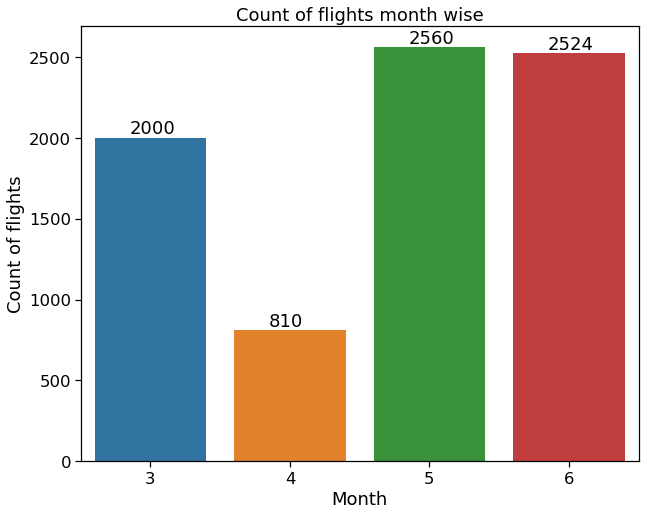

In [23]:
plt.figure(figsize = (10, 8))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [24]:
# Total_Stops
train_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test_data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [25]:
train_data["Airline"].value_counts()

Airline A    2807
Airline B    1545
Airline C    1252
Airline D     906
Airline E     622
Airline F     359
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

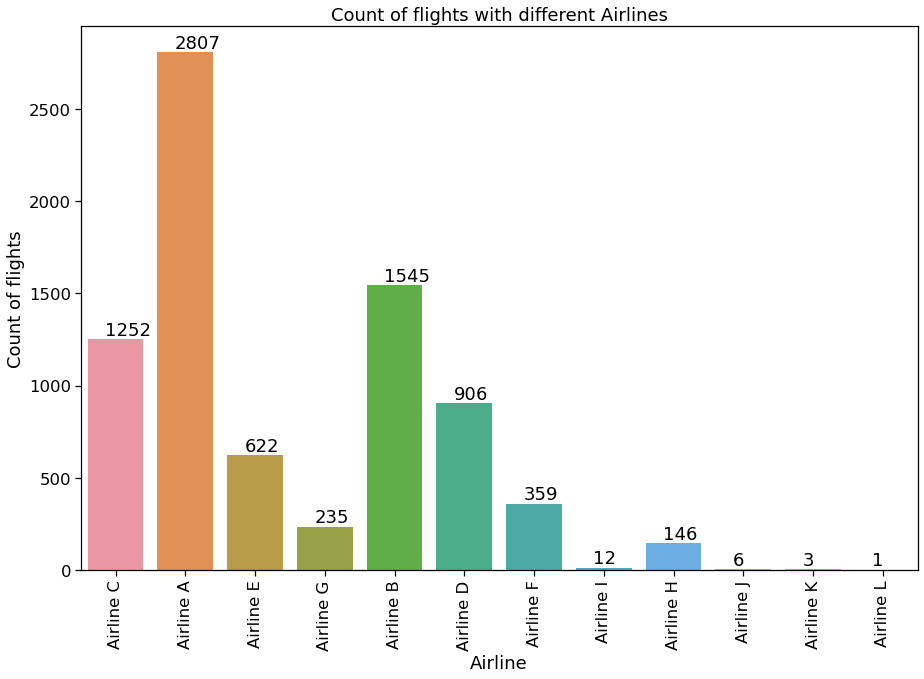

In [26]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

- There are more number of flights of Airline A.

- Airline I,Airline J, Airline K, Airline L have actually almost negligible flights.

In [27]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_data['Airline'], train_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

- The Flight rate for Airline j and Airline A are high.

In [28]:
# Airline
train_data["Airline"].replace({'Airline L':'Other','Airline K':'Other','Airline J':'Other','Airline I':'Other'},inplace=True)

test_data["Airline"].replace({'Airline L':'Other','Airline K':'Other','Airline J':'Other','Airline I':'Other'},inplace=True)

Text(0, 0.5, 'Price of ticket')

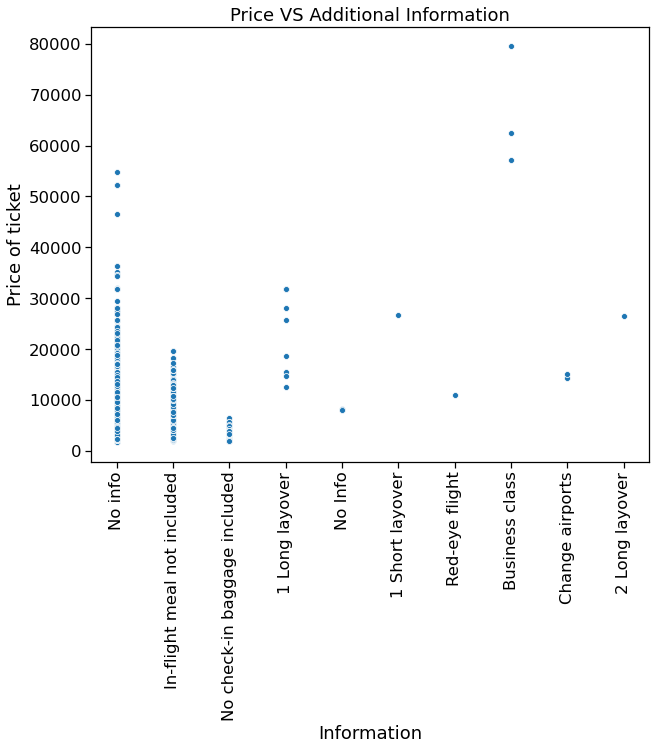

In [29]:
plt.figure(figsize = (10, 8))
plt.title('Price VS Additional Information')
sns.scatterplot(train_data['Additional_Info'], train_data['Price'],data=train_data)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

- From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious

In [30]:
train_data["Additional_Info"].value_counts()

No info                         6162
In-flight meal not included     1465
No check-in baggage included     247
1 Long layover                     9
Business class                     3
No Info                            3
Change airports                    2
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [31]:
# Additional_Info
train_data["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)
test_data["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

In [32]:
train_data.head()

Airline    Source Destination            Route  Duration  Total_Stops  \
0  Airline C     Delhi      Cochin  DEL → MAA → COK       765            1   
1  Airline A  Banglore       Delhi        BLR → DEL       185            0   
2  Airline C     Delhi      Cochin  DEL → BOM → COK       925            1   
3  Airline A   Kolkata    Banglore  CCU → BOM → BLR       735            1   
4  Airline A   Kolkata    Banglore  CCU → BOM → BLR       330            1   

               Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0                      No info   7480           12              6        20   
1                      No info   8016           18              6        18   
2                      No info   8879           18              5         3   
3  In-flight meal not included   9663            6              5        20   
4  In-flight meal not included   9663            9              5         6   

   Dep_min  Arrival_hour  Arrival_min  
0       40             9           25  
1       55            22            0  
2       50            19           15  
3        0             8           15  
4       30            12            0

## Convert categorical data into numerical

In [33]:
data = train_data.drop(["Price"], axis=1)

In [34]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_data.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_data.select_dtypes(include=['int64', 'float','int32'])

In [35]:
train_categorical_data.head()

Airline    Source Destination            Route  \
0  Airline C     Delhi      Cochin  DEL → MAA → COK   
1  Airline A  Banglore       Delhi        BLR → DEL   
2  Airline C     Delhi      Cochin  DEL → BOM → COK   
3  Airline A   Kolkata    Banglore  CCU → BOM → BLR   
4  Airline A   Kolkata    Banglore  CCU → BOM → BLR   

               Additional_Info  
0                      No info  
1                      No info  
2                      No info  
3  In-flight meal not included  
4  In-flight meal not included

In [36]:
#Label encode and hot encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [37]:
train_categorical_data.head()

Airline  Source  Destination  Route  Additional_Info
0        2       2            1    115                4
1        0       0            2     17                4
2        2       2            1     98                4
3        0       3            0     61                1
4        0       3            0     61                1

## Concatenate both catagorical and numerical data

In [38]:
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y=train_data['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)

In [39]:
X.head()

Airline  Source  Destination  Route  Additional_Info  Duration  \
0        2       2            1    115                4       765   
1        0       0            2     17                4       185   
2        2       2            1     98                4       925   
3        0       3            0     61                1       735   
4        0       3            0     61                1       330   

   Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            1           12              6        20       40             9   
1            0           18              6        18       55            22   
2            1           18              5         3       50            19   
3            1            6              5        20        0             8   
4            1            9              5         6       30            12   

   Arrival_min  
0           25  
1            0  
2           15  
3           15  
4            0

In [40]:
y.head()

0    7480
1    8016
2    8879
3    9663
4    9663
Name: Price, dtype: int64

### Building Machine Learning Models

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [42]:
# training testing and splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [43]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (5525, 13)
The size of training output is (5525,)
**************************************************
The size of testing input is (2369, 13)
The size of testing output is (2369,)


### Ridge

In [44]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [45]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [46]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3489.0967409620625
Mean absolute % error:  30.0
R-squared:  0.4430347970645706


In [47]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  3349.574241181558
Mean absolute % error:  31.0
R-squared:  0.4567259893582687


### Lasso

In [48]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [49]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [50]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3497.5309568922
Mean absolute % error:  30.0
R-squared:  0.4403388313960591


In [51]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  3364.2475508269295
Mean absolute % error:  31.0
R-squared:  0.45195577818662347


## K Neighbors Regressor

In [52]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [53]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [54]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2420.1802433648
Mean absolute % error:  14.0
R-squared:  0.7320230354997783


In [55]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  3193.220653681539
Mean absolute % errorr:  21.0
R-squared:  0.5062608413892971


## Decision Tree Regressor

In [56]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [57]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [58]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1479.8706294043125
Mean absolute % error:  12.0
R-squared:  0.8998041941498256


In [59]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))


Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2229.9700251609374
Mean absolute % error:  14.0
R-squared:  0.759210378444675


## Random Forest Regressor

In [60]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [61]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred_RD = random_regressor.predict(X_test)

In [62]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  748.2749186089467
Mean absolute % error:  3.0
R-squared:  0.9743832271437789


In [63]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_RD)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  2229.9700251609374
Mean absolute % error:  8.0
R-squared:  0.759210378444675


## XGB Regressor

In [64]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [65]:
y_train_pred = model.predict(X_train)
y_test_pred_XGB = model.predict(X_test)


In [66]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1004.0899402967718
Mean absolute % error:  8.0
R-squared:  0.9538738430181664


In [67]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred_XGB)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred_XGB)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1477.2438459674818
Mean absolute % error:  10.0
R-squared:  0.759210378444675


In [97]:
y_test_pred_XGB_int = y_test_pred_XGB.astype(int)

In [98]:
y_test_pred_XGB_int

array([6073, 9384, 3114, ..., 9201, 9086, 5155])

#### Random Forest Regressor & XGB Regressor are giving Maximum Accuracy as compare to other Regressor algorithm.

In [68]:
rmse_XGB =  -np.sqrt(np.square(np.log10(y_test_pred_XGB +1) - np.log10(y_test +1)).mean())

In [69]:
#y_test_pred_RD = y_test_pred_RD.astype(int)

In [70]:
#y_test_pred_RD